# NN

In [67]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding 
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalMaxPool1D
from keras.layers import LSTM

In [68]:
df = pd.read_csv("data/books_def.csv", index_col=0)


In [69]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels= encoder.fit_transform(df['genres'].values)
labels

array([9, 1, 0, ..., 5, 5, 5])

In [70]:
df['label'] = labels
df = df.sort_values(by=["label"])
df


,book_desc,book_rating,book_title,genres,label
book_authors,,,,,
Jack London,Of all Jack London's fictions none have been a...,3.98,"The Call of the Wild, White Fang, and Other St...",Classics,0
Constantinos P. Cavafis|Edmund Keeley|Philip Sherrard|George Savidis|C.P. Cavafy,C.P. Cavafy (1863-1933) lived in relative obsc...,4.38,C. P. Cavafy: Collected Poems,Classics,0
Sinclair Lewis,"With Commentary by E. M. Forster, Dorothy Park...",3.76,Main Street,Classics,0
Colette,In Ripening Seed Colette captures that preciou...,3.54,The Ripening Seed,Classics,0
T.S. Eliot|Mary Karr,"Also includes Prufrock and Other Observations,...",4.21,The Waste Land and Other Writings,Classics,0
...,...,...,...,...,...
Robert Muchamore,"CHERUB agents are highly trained, extremely ta...",4.25,Maximum Security,Young Adult,9
Adrienne Torrisi,Sometimes you think you know exactly what life...,3.78,Accidental Crush,Young Adult,9
Katherine Paterson,Jess Aarons' greatest ambition is to be the fa...,3.98,Bridge To Terabithia,Young Adult,9


In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['book_desc'].values, df['label'].values, test_size = 0.2, random_state = 0)

In [72]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
#Transforms each text in texts to a sequence of integers.
list_tokenized_train = tokenizer.texts_to_sequences(x_train)
list_tokenized_test = tokenizer.texts_to_sequences(x_test)

In [73]:
#default batch size 32
#Optional Int, maximum length of all sequences. 
#If not provided, sequences will be padded to the length of the longest individual sequence.
maxlen = 100 
embed_size = 64 
#Pads sequences to the same length.
X_train_final = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_test_final = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [74]:
input = Input(shape=(maxlen, )) 
x   =  Embedding(max_features, embed_size)(input)
x   =  Dropout(0.2)(x)
x   =  Conv1D(10, 3, padding='valid',activation='relu', strides=1)(x)
x   =  GlobalMaxPooling1D()(x)
x   =  Dense(264, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.02))(x)
x   =  Dropout(0.2)(x)
x   =  Dense(128, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.02))(x)
x   =  Dropout(0.2)(x)
x   =  Dense(64, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.02))(x)
x   =  Dropout(0.2)(x)
x   =  Dense(32, activation="softmax", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.02))(x)


In [75]:
model = Model(inputs=input, outputs=x)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [76]:
cnn5 = model.fit(X_train_final, y_train, epochs=20,validation_split=0.2)


Epoch 1/20
733/733 [==============================] - 31s 36ms/step - loss: 2.5972 - accuracy: 0.1825 - val_loss: 2.2279 - val_accuracy: 0.1718
Epoch 2/20
733/733 [==============================] - 26s 36ms/step - loss: 2.2135 - accuracy: 0.1881 - val_loss: 2.1775 - val_accuracy: 0.1812
Epoch 3/20
733/733 [==============================] - 26s 36ms/step - loss: 2.1573 - accuracy: 0.2107 - val_loss: 2.1419 - val_accuracy: 0.2153
Epoch 4/20
733/733 [==============================] - 26s 35ms/step - loss: 2.1139 - accuracy: 0.2407 - val_loss: 2.1155 - val_accuracy: 0.2474
Epoch 5/20
733/733 [==============================] - 28s 38ms/step - loss: 2.0720 - accuracy: 0.2601 - val_loss: 2.1101 - val_accuracy: 0.2943
Epoch 6/20
733/733 [==============================] - 26s 36ms/step - loss: 2.0373 - accuracy: 0.2752 - val_loss: 2.1101 - val_accuracy: 0.3105
Epoch 7/20
733/733 [==============================] - 26s 36ms/step - loss: 2.0032 - accuracy: 0.2889 - val_loss: 2.1217 - val_accuracy:

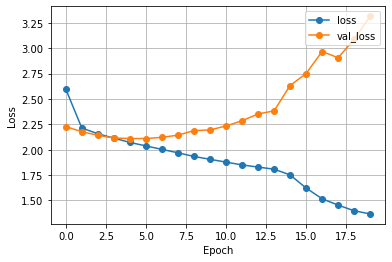

In [77]:
plt.plot(cnn5.history['loss'], label='loss', marker = 'o')
plt.plot(cnn5.history['val_loss'], label = 'val_loss', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend(loc='upper right')